## Perform imports:

In [3]:
import matplotlib.pyplot as plot
import numpy
import urllib.request
try:
    import o2py
except ImportError:
    urllib.request.urlretrieve('http://raw.githubusercontent.com/awsteiner/o2scl'+
         '/master/src/other/o2py.py','o2py.py')
    try:
        import o2py
    except:
        raise ImportError('Could not import o2py, even after download.')
print('Success.')

Success.


## Inner crust

In [4]:
hr=o2py.hdf5_reader()
(nn_tab,loc_type)=hr.h5read_name('inner_nn.o2','inner_nn')
w_nn=nn_tab['data/w']
r_nn=nn_tab['data/r']
w_nn=w_nn[:100000]
r_nn=r_nn[:100000]
(nnuc_tab,loc_type)=hr.h5read_name('inner_nnuc.o2','inner_nnuc')
w_nnuc=nnuc_tab['data/w']
r_nnuc=nnuc_tab['data/r']
Rn_nnuc=nnuc_tab['data/Rn']
A_nnuc=nnuc_tab['data/A']
nb_nnuc=nnuc_tab['data/nb']
print('Loaded',len(w_nn),'neutrons and',len(w_nnuc),'nuclei.')
nb_nnuc_temp=[abs(r_nnuc[i]-10.8) for i in range(0,len(r_nnuc))]
rho_108=nb_nnuc[numpy.argmin(nb_nnuc_temp)]*2.8e14/0.16
nb_nnuc_temp=[abs(r_nnuc[i]-10.9) for i in range(0,len(r_nnuc))]
rho_109=nb_nnuc[numpy.argmin(nb_nnuc_temp)]*2.8e14/0.16
nb_nnuc_temp=[abs(r_nnuc[i]-11.0) for i in range(0,len(r_nnuc))]
rho_110=nb_nnuc[numpy.argmin(nb_nnuc_temp)]*2.8e14/0.16
nb_nnuc_temp=[abs(r_nnuc[i]-11.1) for i in range(0,len(r_nnuc))]
rho_111=nb_nnuc[numpy.argmin(nb_nnuc_temp)]*2.8e14/0.16
nb_nnuc_temp=[abs(r_nnuc[i]-11.2) for i in range(0,len(r_nnuc))]
rho_112=nb_nnuc[numpy.argmin(nb_nnuc_temp)]*2.8e14/0.16
nb_nnuc_temp=[abs(r_nnuc[i]-11.3) for i in range(0,len(r_nnuc))]
rho_113=nb_nnuc[numpy.argmin(nb_nnuc_temp)]*2.8e14/0.16
print(rho_108,rho_109,rho_110,rho_111,rho_112,rho_113)

Loaded 100000 neutrons and 1188 nuclei.
1.36853880042e+14 1.02282848999e+14 5.74951749778e+13 2.56886472045e+13 9.00976660443e+12 1.80208591559e+12


In [6]:
def latex_float(f):
    float_str = "{0:.2g}".format(f)
    if "e" in float_str:
        base, exponent = float_str.split("e")
        return r"${0} \times 10^{{{1}}}$".format(base, int(exponent))
    else:
        return float_str
print(latex_float(rho_108))

$1.4 \times 10^{14}$


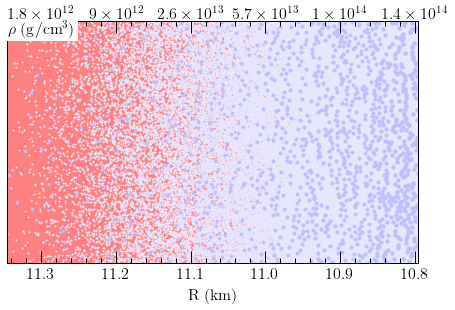

In [19]:
plot.rc('text',usetex=True)
plot.rc('font',family='serif')
plot.rcParams['lines.linewidth']=0.5
fig=plot.figure(1,figsize=(6.0,4.0))
fig.set_facecolor('white')
lmar=0.01
bmar=0.12
rmar=0.04
tmar=0.04
ax=plot.axes([lmar,bmar,1.0-lmar-rmar,1.0-tmar-bmar])
ax.minorticks_on()
ax.tick_params('both',length=12,width=1,which='major')
ax.tick_params('both',length=5,width=1,which='minor')
ax.set_axis_bgcolor((1.0,0.5,0.5))
ax.set_yticks([])
plot.grid(False)
plot.xlim([numpy.max(r_nnuc),numpy.min(r_nnuc)])
plot.plot(r_nn,w_nn,marker='o',lw=0,mfc=(0.9,0.9,1.0),
          mec=(0.9,0.9,1.0),mew=0.0,ms=2.0)
for i in range(0,len(r_nnuc)):
    plot.plot(r_nnuc[i],w_nnuc[i],
              marker='.',lw=0,mfc=(0.75,0.75,1.0),mec=(0.75,0.75,1.0),
              ms=Rn_nnuc[i])
plot.xlabel('$\mathrm{R~(km)}$',fontsize=16)
plot.text(11.3,0.97,r'$\rho~(\mathrm{g}/\mathrm{cm}^3)$',fontsize=16,
          va='center',ha='center',
          bbox=dict(facecolor='white',lw=0))
plot.text(10.8,1.03,latex_float(rho_108),fontsize=16,
          va='center',ha='center')
plot.text(10.9,1.03,latex_float(rho_109),fontsize=16,
          va='center',ha='center')
plot.text(11.0,1.03,latex_float(rho_110),fontsize=16,
          va='center',ha='center')
plot.text(11.1,1.03,latex_float(rho_111),fontsize=16,
          va='center',ha='center')
plot.text(11.2,1.03,latex_float(rho_112),fontsize=16,
          va='center',ha='center')
plot.text(11.3,1.03,latex_float(rho_113),fontsize=16,
          va='center',ha='center')
for label in ax.get_xticklabels():
    label.set_fontsize(16)
plot.show()

## Outer crust

In [24]:
hr=o2py.hdf5_reader()
(nnuc_tab,loc_type)=hr.h5read_name('outer_nnuc.o2','outer_nnuc')
w_nnuc=nnuc_tab['data/w']
r_nnuc=nnuc_tab['data/r']
Rn_nnuc=nnuc_tab['data/Rn']
A_nnuc=nnuc_tab['data/A']
nb_nnuc=nnuc_tab['data/nb']
print('Loaded',len(w_nnuc),'nuclei.')
nb_nnuc_temp=[abs(r_nnuc[i]-11.4) for i in range(0,len(r_nnuc))]
rho_114=nb_nnuc[numpy.argmin(nb_nnuc_temp)]*2.8e14/0.16
nb_nnuc_temp=[abs(r_nnuc[i]-11.5) for i in range(0,len(r_nnuc))]
rho_115=nb_nnuc[numpy.argmin(nb_nnuc_temp)]*2.8e14/0.16
nb_nnuc_temp=[abs(r_nnuc[i]-11.6) for i in range(0,len(r_nnuc))]
rho_116=nb_nnuc[numpy.argmin(nb_nnuc_temp)]*2.8e14/0.16
nb_nnuc_temp=[abs(r_nnuc[i]-11.7) for i in range(0,len(r_nnuc))]
rho_117=nb_nnuc[numpy.argmin(nb_nnuc_temp)]*2.8e14/0.16
print(rho_114,rho_115,rho_116,rho_117)

Loaded 1200 nuclei.
270904829082.0 74940919080.6 13986655620.0 432943437.175


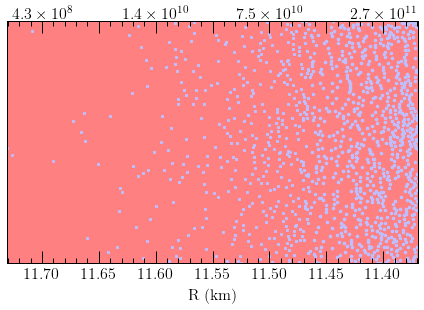

In [25]:
plot.rc('text',usetex=True)
plot.rc('font',family='serif')
plot.rcParams['lines.linewidth']=0.5
fig=plot.figure(1,figsize=(6.0,4.0))
fig.set_facecolor('white')
lmar=0.01
bmar=0.12
rmar=0.04
tmar=0.04
ax=plot.axes([lmar,bmar,1.0-lmar-rmar,1.0-tmar-bmar])
ax.minorticks_on()
ax.tick_params('both',length=12,width=1,which='major')
ax.tick_params('both',length=5,width=1,which='minor')
ax.set_axis_bgcolor((1.0,0.5,0.5))
ax.set_yticks([])
plot.grid(False)
plot.xlim([numpy.max(r_nnuc),numpy.min(r_nnuc)])
for i in range(0,len(r_nnuc)):
    plot.plot(r_nnuc[i],w_nnuc[i],
              marker='.',lw=0,mfc=(0.75,0.75,1.0),mec=(0.75,0.75,1.0),
              ms=Rn_nnuc[i])
plot.xlabel('$\mathrm{R~(km)}$',fontsize=16)
for label in ax.get_xticklabels():
    label.set_fontsize(16)
plot.text(11.4,1.03,latex_float(rho_114),fontsize=16,
          va='center',ha='center')
plot.text(11.5,1.03,latex_float(rho_115),fontsize=16,
          va='center',ha='center')
plot.text(11.6,1.03,latex_float(rho_116),fontsize=16,
          va='center',ha='center')
plot.text(11.7,1.03,latex_float(rho_117),fontsize=16,
          va='center',ha='center')
plot.show()